<a href="https://colab.research.google.com/github/Manojgharge07/Data_Science_Projects/blob/main/Predictive_Maintance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Predictive Maintenance

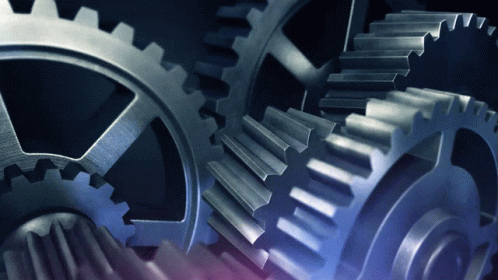

In [1]:
#Import some important libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
#Loading dataset:
df = pd.read_csv("/content/drive/MyDrive/All CSV files/predictive_maintenance.csv")
#Preview dataset: 
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
#Dimension of dataset:
df.shape

(10000, 10)

In this dataset we having 10000 Rows & 10 Columns. 

In [4]:
#Names Of columns in our dataset:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [5]:
#Information about dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
#Total description:
df.describe().style.background_gradient(cmap="magma")

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.895680,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.750000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.500000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.250000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


Total description of dataset. We getting Mean, Min No., Max No., Count of each feature & etc.

In [7]:
#Checking value count and understand the data:
df.value_counts

<bound method DataFrame.value_counts of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torqu

In [8]:
#Checking null value count in data:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

Here is No null values in dataset.

In [9]:
## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C] 

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [10]:
#Feature engineering: 
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,UDI,Product ID,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
6218,6219,H35632,H,28.85,38.45,1366,50.6,106,0,No Failure,9.6
1781,1782,L48961,L,26.35,35.95,1662,28.6,48,0,No Failure,9.6
5957,5958,L53137,L,28.55,38.75,1637,37.2,115,0,No Failure,10.2
8890,8891,L56070,L,25.55,36.65,1616,34.2,114,0,No Failure,11.1
8671,8672,L55851,L,25.35,36.65,1530,37.8,157,0,No Failure,11.3


We do feature engineering here & convert kelvin to centigrate & renaming the features. 

In [11]:
#Total description of dataset:
df.describe().style.background_gradient(cmap="BuGn") 

,UDI,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2886.895680,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,1.000000,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,2500.750000,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,5000.500000,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,7500.250000,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,10000.000000,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


In [12]:
#To check unique values in dataframe:
df.nunique()

UDI                            10000
Product ID                     10000
Type                               3
Air temperature [°C]              93
Process temperature [°C]          82
Rotational speed [rpm]           941
Torque [Nm]                      577
Tool wear [min]                  246
Target                             2
Failure Type                       6
Temperature difference [°C]       83
dtype: int64

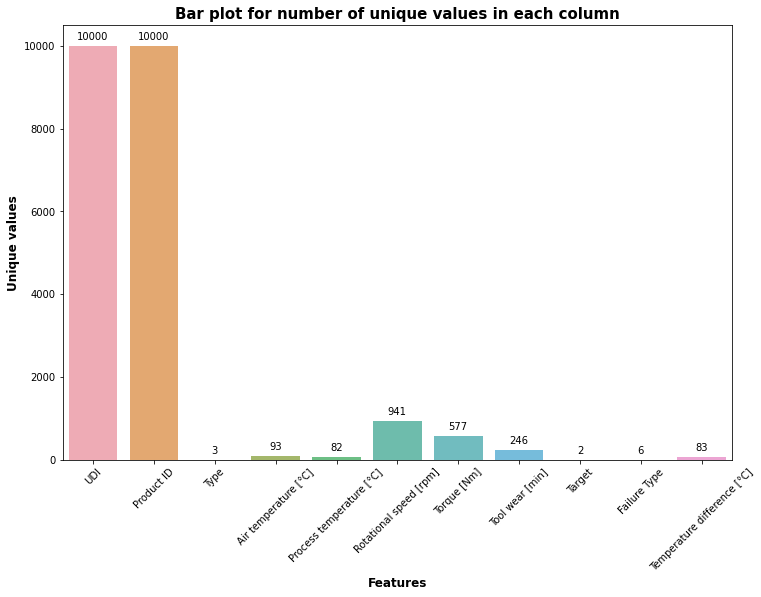

In [13]:
#Represent the bar plot of unique values in each column:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(12,8))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=45)
plt.show()

We can extract(remove) 2 features ID and UDI because we make model fast after some removing noise in dataset. They help us to improve accuracy. 

In [14]:
#Drop some features:
df1=df.drop(columns= ['UDI', 'Product ID'])
df1

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5
2,L,25.95,36.35,1498,49.4,5,0,No Failure,10.4
3,L,26.05,36.45,1433,39.5,7,0,No Failure,10.4
4,L,26.05,36.55,1408,40.0,9,0,No Failure,10.5
...,...,...,...,...,...,...,...,...,...
9995,M,26.65,36.25,1604,29.5,14,0,No Failure,9.6
9996,H,26.75,36.25,1632,31.8,17,0,No Failure,9.5
9997,M,26.85,36.45,1645,33.4,22,0,No Failure,9.6
9998,H,26.85,36.55,1408,48.5,25,0,No Failure,9.7


We change the dtype here & assign ['L'/'LOW'] to 1, ['M'/'MEDIUM'] to 2 & ['H'/'HIGH'] to 3. Because object can't read our model. So we convert object to integer.

In [15]:
#In dataset 'Type' dtype of object converted to int64:
df1['Type'] = df1['Type'].map({
   'L' : 1,
    'M' : 2,
    'H' : 3
})

df1['Type'].value_counts()

1    6000
2    2997
3    1003
Name: Type, dtype: int64

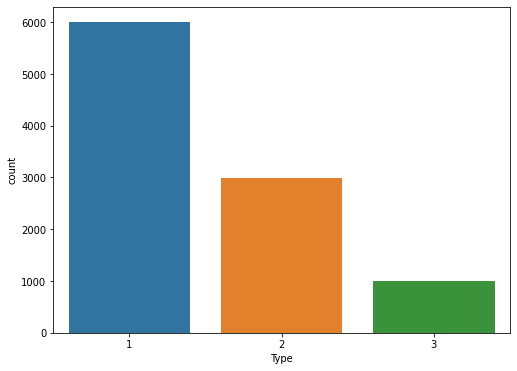

In [22]:
#Display Bar plot & Pie chart of "Type"
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df1)
#ax.bar_label(ax.containers[0])


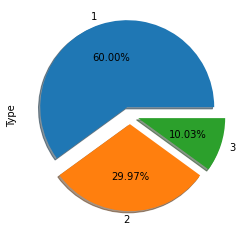

In [38]:
#plt.title("Type", fontsize=35,color='Red',font='Times New Roman', weight= 'bold')
ax =plt.subplot(1,1,1)
ax=df1['Type'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],autopct='%1.2f%%',shadow=True);
#ax.set_title(color='Red',font='Times New Roman')

Representing 'Types' with help of Bar plot & Pie chart to better understanding. Here we see there are 3 types of machines. The count of 1[L] is 6000, 2[M] is 2997 & 3[H] is 1003.

In [39]:
df1['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

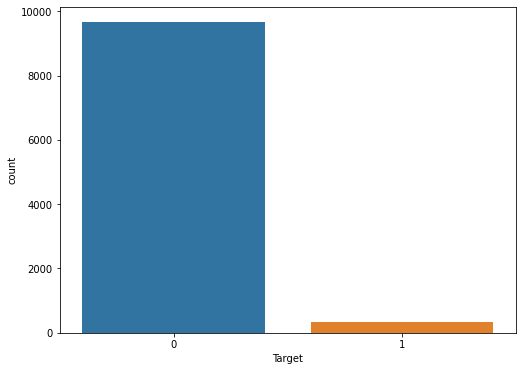

In [46]:
#Display Bar plot & Pie chart of "Target"
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df1)

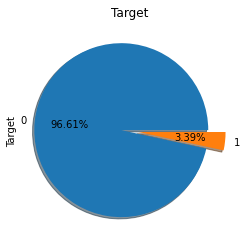

In [47]:
plt.title("Target")
ax =plt.subplot(1,1,1)
ax=df1['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);

Representing 'Target' with help of Bar plot & Pie chart to better understanding. We clearly seen there are binary values 0 & 1. 0 stand for No Failure & 1 stands for Failure.

In [48]:
#We find what type of failure occures in dataset:
df1['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

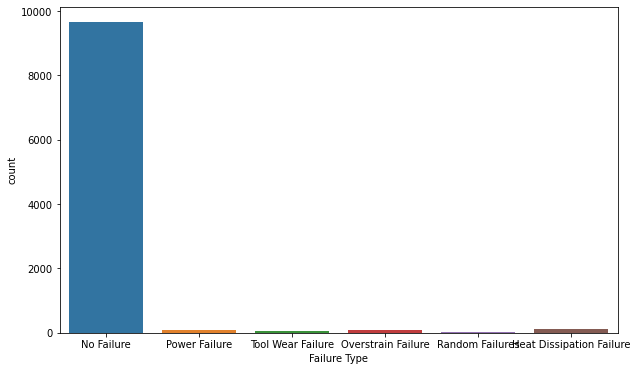

In [61]:
ax = plt.figure(figsize=(22,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Failure Type', data=df1)
#ax.bar_label(ax.containers[0])
#plt.title("Failure Type", fontsize=35,color='Black',font='Times New Roman', weight= 'bold')

Rotational speed & Torque have normally distrubuted. The all displot represent their feature Vs counts

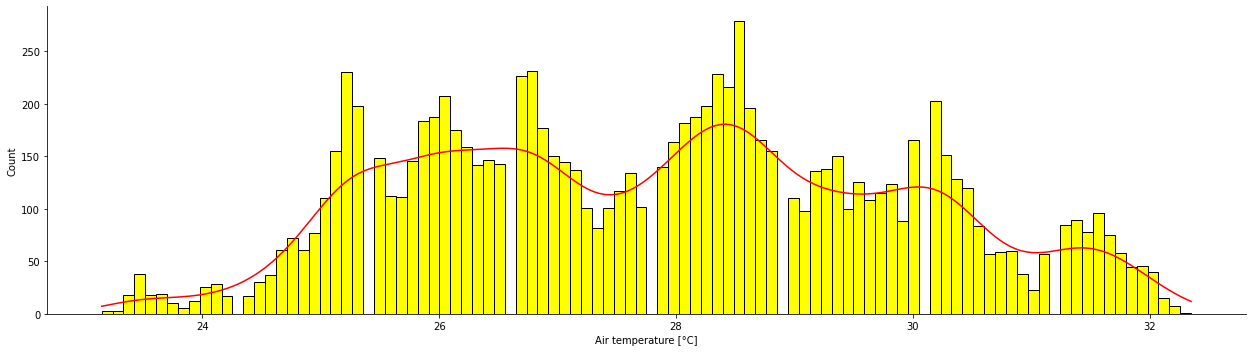

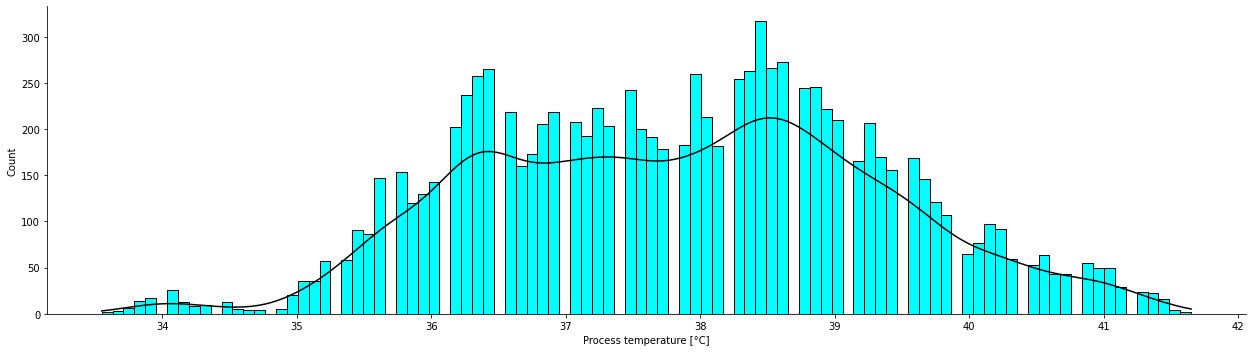

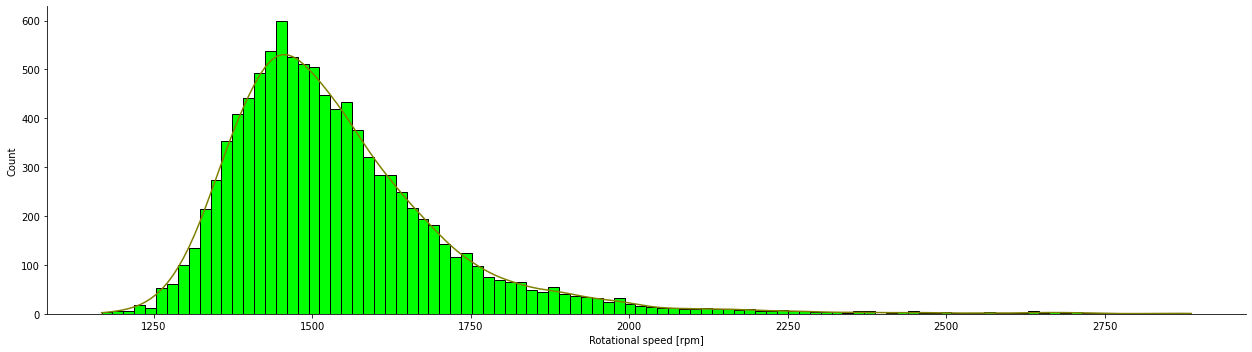

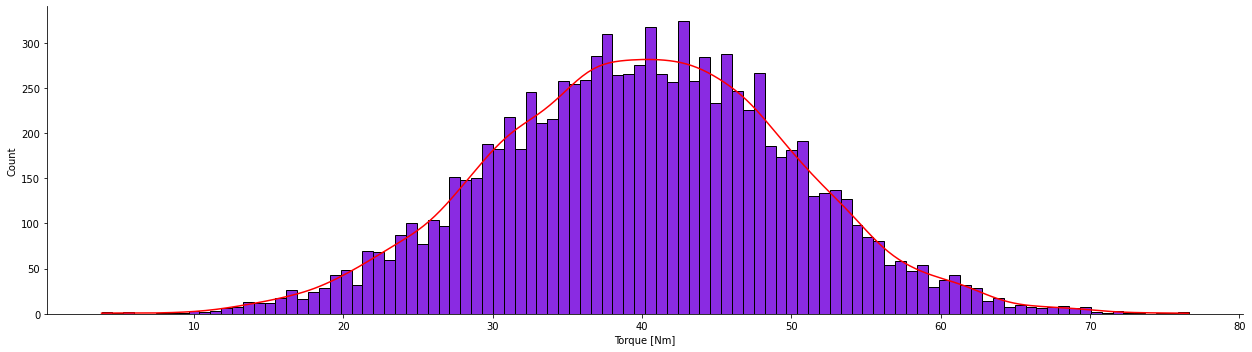

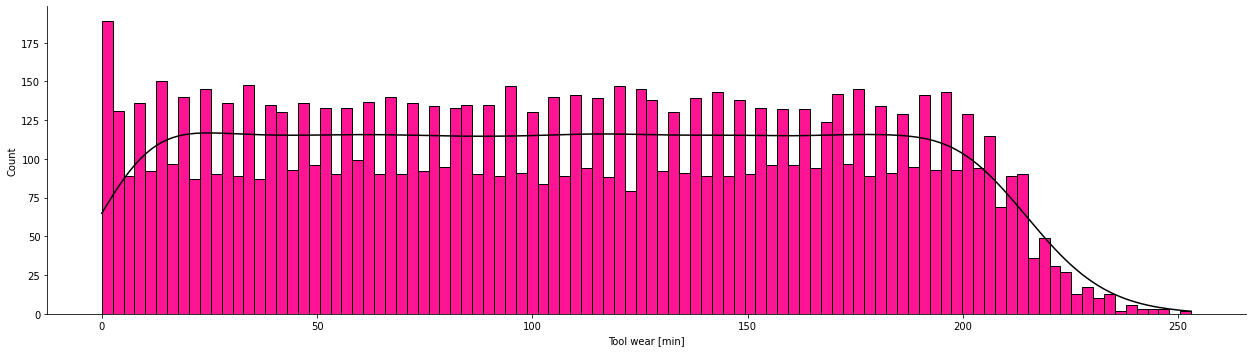

In [62]:
#Here we can see displot of every feature:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "black", facecolor = "aqua",height = 5, aspect = 3.5);
sns.displot(data=df, x="Rotational speed [rpm]", kde=True, bins = 100,color = "olive", facecolor = "lime",height = 5, aspect = 3.5);
sns.displot(data=df, x="Torque [Nm]", kde=True, bins = 100,color = "red", facecolor = "blueviolet",height = 5, aspect = 3.5);
sns.displot(data=df, x="Tool wear [min]", kde=True, bins = 100,color = "black", facecolor = "deeppink",height = 5, aspect = 3.5);


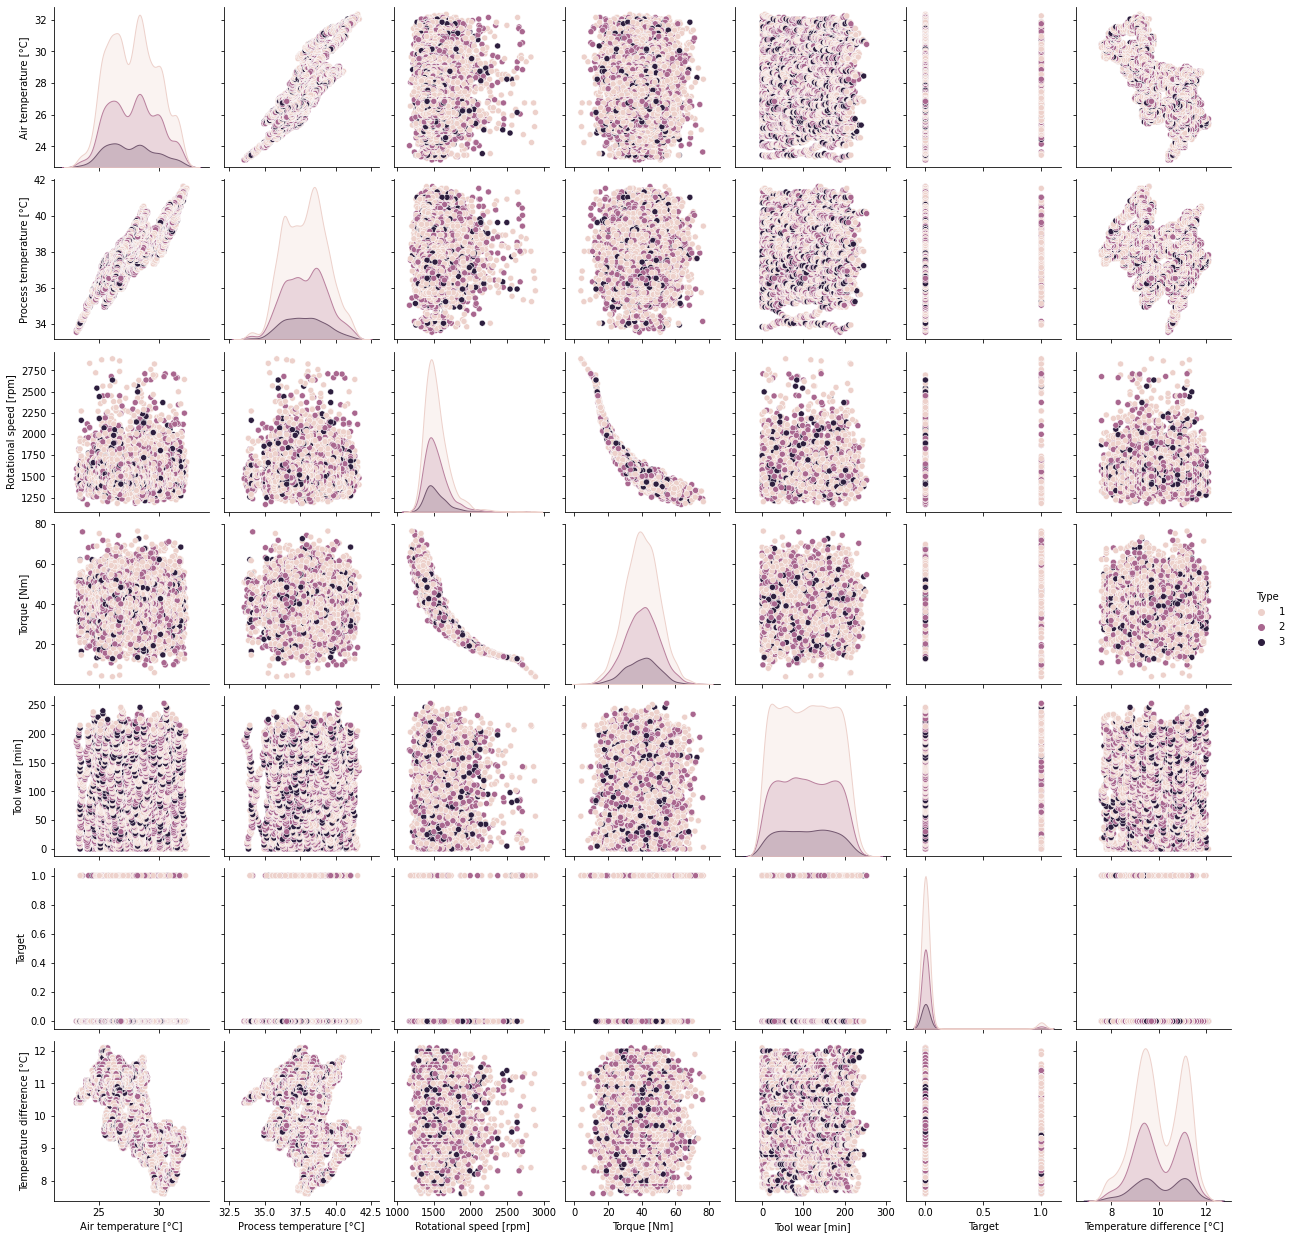

In [63]:
#To show the relation in between every features:
sns.pairplot(data=df1, hue='Type')
plt.show()

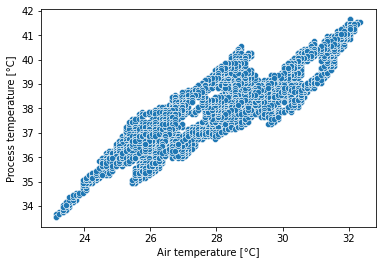

In [64]:
sns.scatterplot(data=df1, x="Air temperature [°C]", y="Process temperature [°C]")

The features Air Temprature and Process Temprature relationship is directly proportional.

We display the relationship of Torque and Rotational speed with different features.

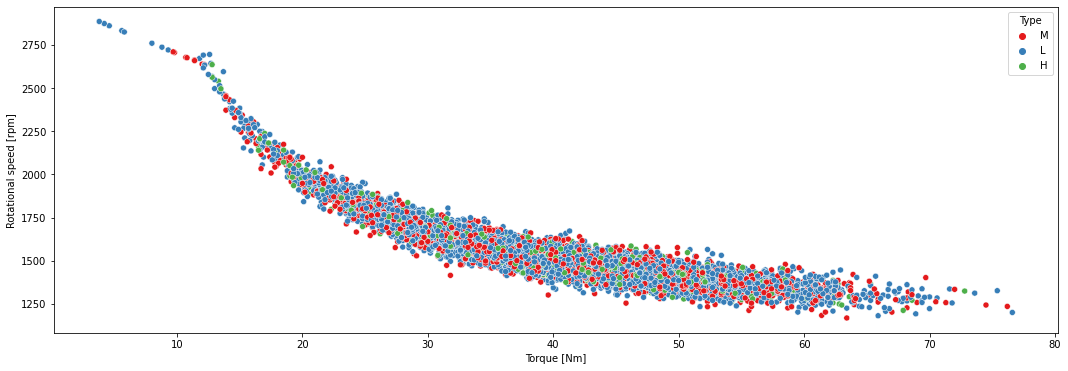

In [66]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="Set1");

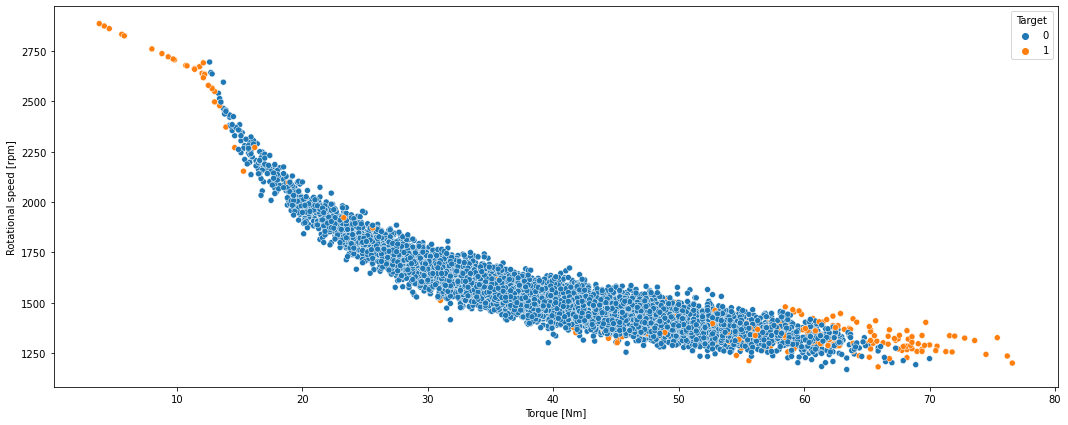

In [67]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",cmap="rocket");

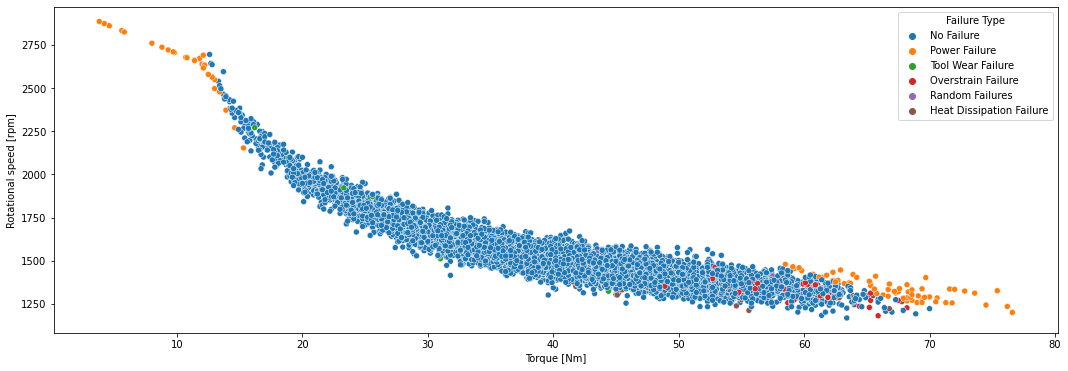

In [68]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=df1, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",cmap='viridis_r');

The Torque and Rotational speed relationship is inversely proportional. Hyperparameter hue shows vector in data & Grouping variable that will produce points with different colors. The relationship of Torque and Rotational speed with basis of Failure Type.

In [69]:
df1.describe()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.500300,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,0.671301,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,1.000000,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,1.000000,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,1.000000,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,2.000000,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,3.000000,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


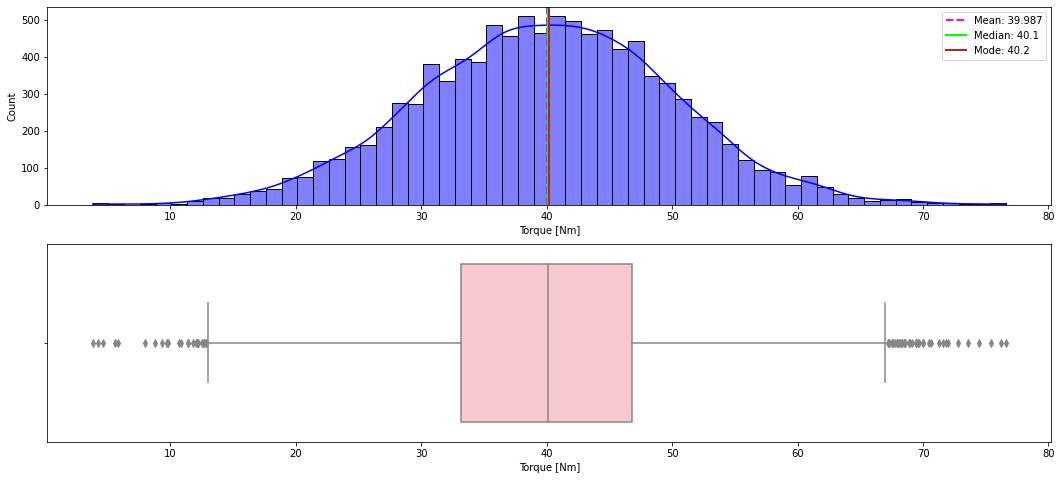

In [70]:
#Display box plot to understand outliers:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df1[feature], kde = True, ax = ax[0],color='blue')

    ax[0].axvline(x = df1[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df1[feature].mean(), 3)))
    ax[0].axvline(x = df1[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df1[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df1[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df1[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df1[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Torque [Nm]')

This curve is total normally distrubuted. The mean, mesian & mode is almost equal.

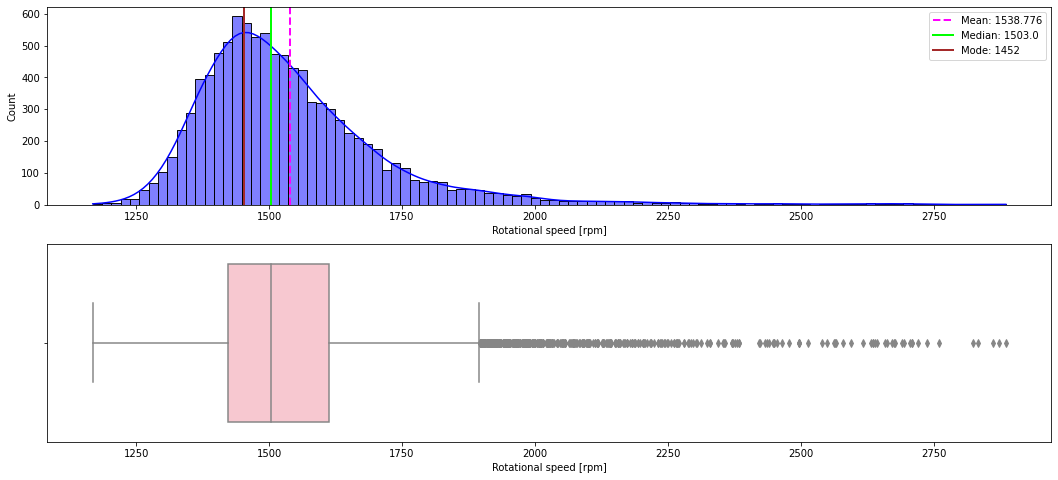

In [71]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df1[feature], kde = True, ax = ax[0],color='blue')

    ax[0].axvline(x = df1[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df1[feature].mean(), 3)))
    ax[0].axvline(x = df1[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df1[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df1[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df1[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df1[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Rotational speed [rpm]')

Doing some feature engineering here about handelling outliers. Using IQR technique.

In [72]:
percentile25 = df1['Rotational speed [rpm]'].quantile(0.25)
percentile75 = df1['Rotational speed [rpm]'].quantile(0.75)

In [73]:
upper_limit = percentile75 + 1.5 * 189
lower_limit = percentile25 - 1.5 * 189

In [77]:
df1[df1['Rotational speed [rpm]'] > upper_limit]
df1[df1['Rotational speed [rpm]'] < lower_limit]

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]


In [78]:
df2 = df1[df1['Rotational speed [rpm]'] < upper_limit]
df2.shape

(9582, 9)

After removing outliers the data shape is changes from 10000 to 9582 rows.

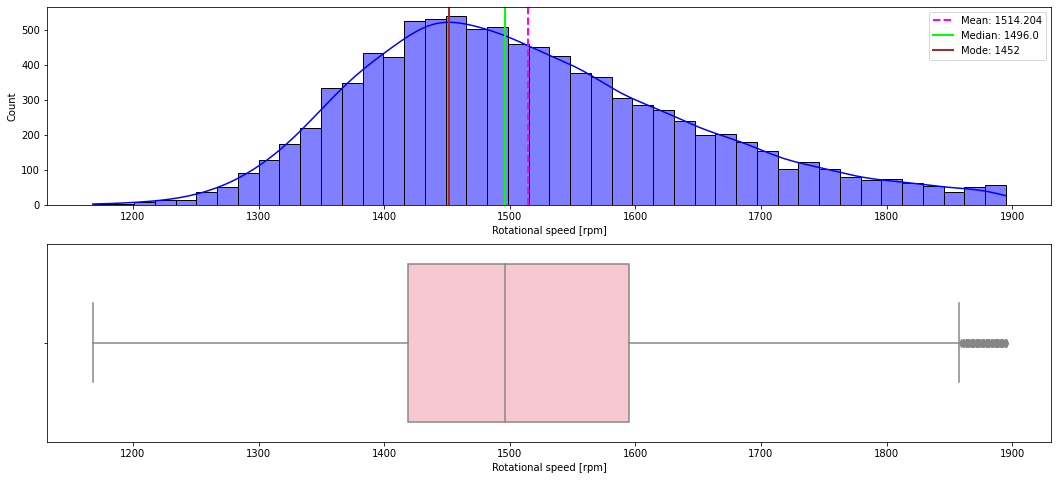

In [80]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df2[feature], kde = True, ax = ax[0],color='blue')

    ax[0].axvline(x = df2[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df2[feature].mean(), 3)))
    ax[0].axvline(x = df2[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df2[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df2[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df2[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df2[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Rotational speed [rpm]')

This curve is comes under normally distrubuted. The mean, mesian & mode is almost close.

#Feature Selsection
Loading previous dataset

In [90]:
df1.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,2,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,1,26.05,36.55,1408,46.3,3,0,No Failure,10.5
2,1,25.95,36.35,1498,49.4,5,0,No Failure,10.4
3,1,26.05,36.45,1433,39.5,7,0,No Failure,10.4
4,1,26.05,36.55,1408,40.0,9,0,No Failure,10.5


In [92]:
print(df1.loc[[69]])

    Type  Air temperature [°C]  Process temperature [°C]  \
69     1                 26.75                     36.85   

    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
69                    1410         65.7              191       1   

     Failure Type  Temperature difference [°C]  
69  Power Failure                         10.1  


In [82]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.2 MB/s eta 0:00:00


In [84]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df2 = encoder.fit_transform(df1)
df2

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5
2,2,25.95,36.35,1498,49.4,5,0,1,10.4
3,2,26.05,36.45,1433,39.5,7,0,1,10.4
4,2,26.05,36.55,1408,40.0,9,0,1,10.5
...,...,...,...,...,...,...,...,...,...
9995,1,26.65,36.25,1604,29.5,14,0,1,9.6
9996,3,26.75,36.25,1632,31.8,17,0,1,9.5
9997,1,26.85,36.45,1645,33.4,22,0,1,9.6
9998,3,26.85,36.55,1408,48.5,25,0,1,9.7


In [93]:
print(df2.loc[[69]])

    Type  Air temperature [°C]  Process temperature [°C]  \
69     2                 26.75                     36.85   

    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
69                    1410         65.7              191       1   

    Failure Type  Temperature difference [°C]  
69             2                         10.1  


We say here In 'Failure Type' feature If machines have No Failure is replace with 1 & its Failure for any reason we replace as 2.

In [94]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df2['Failure Type'] = scaler.fit_transform(df2['Failure Type'])

Seprating the independent & dependent veriable. We saved predictors(independent) in X variable & target(dependent) in y variable.

In [95]:
#Drop the dependent feature here:
X = df2.drop(columns="Failure Type" , axis=1)
y = df2["Failure Type"]

In [96]:
#Check the shpe of X & y:
print(X.shape)
print(y.shape)

(10000, 8)
(10000,)


In [97]:
#Splitting train & test:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
#shape of train & test:
print(X_train.shape), 
print(y_train.shape),
print(X_test.shape),
print(y_test.shape)

(8000, 8)
(8000,)
(2000, 8)
(2000,)


#Model Fitting

##Logistic Regression:

Training Accuracy    : 96.55 %
Testing Accuracy Score : 96.85 %
************************************************************
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1935
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        11
           3       0.38      0.23      0.29        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        15

    accuracy                           0.97      2000
   macro avg       0.22      0.21      0.21      2000
weighted avg       0.94      0.97      0.96      2000

************************************************************


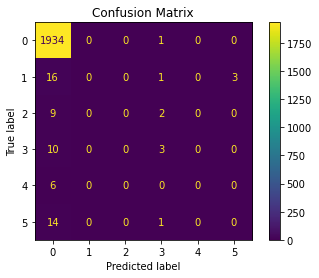

In [99]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Testing Accuracy Score :",log_accuracy ,"%")
print("***"*20)
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("***"*20)
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

##Decision Tree:

Training Accuracy    : 100.0 %
Testing Accuracy Score : 99.0 %
************************************************************
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.94      0.80      0.86        20
           2       1.00      0.73      0.84        11
           3       0.75      0.92      0.83        13
           4       0.00      0.00      0.00         6
           5       0.88      1.00      0.94        15

    accuracy                           0.99      2000
   macro avg       0.76      0.74      0.74      2000
weighted avg       0.99      0.99      0.99      2000

************************************************************


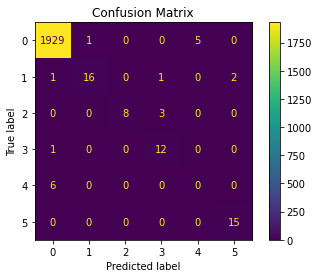

In [100]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Testing Accuracy Score :",decision_accuracy ,"%")
print("***"*20)
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("***"*20)
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

##Random Forest:

Training Accuracy    : 100.0 %
Testing Accuracy Score : 99.45 %
************************************************************
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       1.00      0.90      0.95        20
           2       1.00      0.82      0.90        11
           3       0.81      1.00      0.90        13
           4       0.00      0.00      0.00         6
           5       0.88      1.00      0.94        15

    accuracy                           0.99      2000
   macro avg       0.78      0.79      0.78      2000
weighted avg       0.99      0.99      0.99      2000

************************************************************


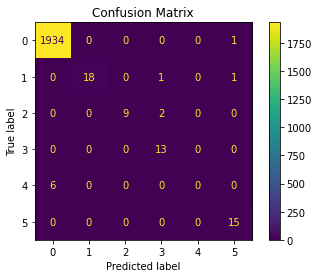

In [101]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Testing Accuracy Score :",random_forest_accuracy ,"%")
print("***"*20)
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("***"*20)
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

##Support Vector Machines:

Training Accuracy    : 96.51 %
Testing Accuracy Score : 96.8 %
************************************************************
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1935
           1       1.00      0.05      0.10        20
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        15

    accuracy                           0.97      2000
   macro avg       0.33      0.18      0.18      2000
weighted avg       0.95      0.97      0.95      2000

************************************************************


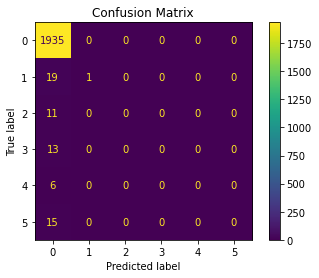

In [102]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Testing Accuracy Score :",svc_accuracy ,"%")
print("***"*20)
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("***"*20)
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix');

##LightGBM:

Training Accuracy    : 100.0 %
Testing Accuracy Score : 99.4 %
************************************************************
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       1.00      0.85      0.92        20
           2       1.00      0.73      0.84        11
           3       0.81      1.00      0.90        13
           4       0.00      0.00      0.00         6
           5       0.88      1.00      0.94        15

    accuracy                           0.99      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.99      0.99      0.99      2000

************************************************************


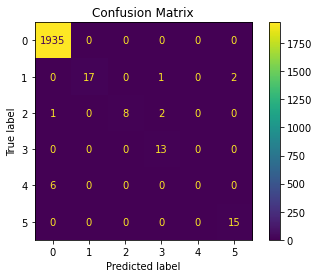

In [103]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

lgbm_train = round(lgbm.score(X_train, y_train) * 100, 2)
lgbm_accuracy = round(accuracy_score(y_pred_lgbm, y_test) * 100, 2)

print("Training Accuracy    :",lgbm_train ,"%")
print("Testing Accuracy Score :",lgbm_accuracy ,"%")
print("***"*20)
print("Classification_Report: \n",classification_report(y_test,y_pred_lgbm))
print("***"*20)
plot_confusion_matrix(lgbm, X_test, y_test);
plt.title('Confusion Matrix');

##Naive_Bayes:

Training Accuracy    : 99.46 %
Testing Accuracy Score : 99.2 %
************************************************************
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.93      0.70      0.80        20
           2       0.91      0.91      0.91        11
           3       0.75      0.92      0.83        13
           4       0.00      0.00      0.00         6
           5       0.79      1.00      0.88        15

    accuracy                           0.99      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.99      0.99      0.99      2000

************************************************************


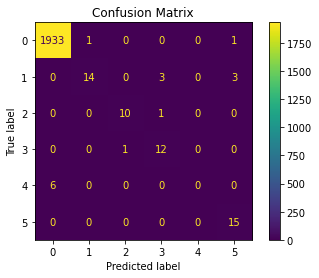

In [104]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

gnb_train = round(gnb.score(X_train, y_train) * 100, 2)
gnb_accuracy = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)

print("Training Accuracy    :",gnb_train ,"%")
print("Testing Accuracy Score :",gnb_accuracy ,"%")
print("***"*20)
print("Classification_Report: \n",classification_report(y_test,y_pred_gnb))
print("***"*20)
plot_confusion_matrix(gnb, X_test, y_test);
plt.title('Confusion Matrix');

# Model Building

In [107]:
models = pd.DataFrame({
    'Testing': [
        'Support Vector Machines', 'LightGBM', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],
    
    'Training Accuracy':
    [svc_train, lgbm_train, log_train, random_forest_train, decision_train],
    
    'Testing Accuracy Score': [
        svc_accuracy, lgbm_accuracy, log_accuracy, random_forest_accuracy, decision_accuracy
    ]
})

In [108]:
pd.set_option('display.precision',2)
models.sort_values(by='Testing Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Testing,Training Accuracy,Testing Accuracy Score
Random Forest,100.00,99.45
LightGBM,100.00,99.40
Decision Tree,100.00,99.00
Logistic Regression,96.55,96.85
Support Vector Machines,96.51,96.80


Conclusion:
Logistic Regression and Support Vector Mchine are best model fitting algorithm for this problem.


     Algorithms  -  Training Accuracy & Testing Accuracy
1.   Logistic Regression    -         **96.55%              96.85%**
2.   Support Vector Mchine  -         **96.51%              96.80%** 

